# Dataset information

This is a transnational data set which contains all the transactions occurring between 01/12/2010 and 09/12/2011 for a UK-based and registered non-store online retail.The company mainly sells unique all-occasion gifts. Many customers of the company are wholesalers.


## Attributes

__1 Invoice number:__ Nominal, a 6-digit integral number uniquely assigned to each transaction. If this code starts with letter 'c', it indicates a cancellation. 

__2 StockCode:__ Product (item) code. Nominal, a 5-digit integral number uniquely assigned to each distinct product. 

__3 Description:__ Product (item) name. Nominal. 

__4 Quantity:__ The quantities of each product (item) per transaction. Numeric.	

__5 InvoiceDate:__ Invice Date and time. Numeric, the day and time when each transaction was generated. 

__6 UnitPrice:__ Unit price. Numeric, Product price per unit in sterling. 

__7 CustomerID:__ Customer number. Nominal, a 5-digit integral number uniquely assigned to each customer. 

__8 Country:__ Country name. Nominal, the name of the country where each customer resides.


In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

# Exploratory Data Analysis

In [2]:
data = pd.read_excel("Online Retail.xlsx")

In [3]:
data.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [4]:
#Dimension of the data
print("Dimension of the data {}".format(data.shape))

Dimension of the data (541909, 8)


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
InvoiceNo      541909 non-null object
StockCode      541909 non-null object
Description    540455 non-null object
Quantity       541909 non-null int64
InvoiceDate    541909 non-null datetime64[ns]
UnitPrice      541909 non-null float64
CustomerID     406829 non-null float64
Country        541909 non-null object
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB


__Note:__ that some columns are missing in the columns (Description, CustomerID).

In [6]:
# Quick summary of the features, data time not shown
data.describe(include=['int64', 'float64', 'object'])

,InvoiceNo,StockCode,Description,Quantity,UnitPrice,CustomerID,Country
count,541909.0,541909,540455,541909.000000,541909.000000,406829.000000,541909
unique,25900.0,4070,4223,NaN,NaN,NaN,38
top,573585.0,85123A,WHITE HANGING HEART T-LIGHT HOLDER,NaN,NaN,NaN,United Kingdom
freq,1114.0,2313,2369,NaN,NaN,NaN,495478
mean,NaN,NaN,NaN,9.552250,4.611114,15287.690570,NaN
std,NaN,NaN,NaN,218.081158,96.759853,1713.600303,NaN
min,NaN,NaN,NaN,-80995.000000,-11062.060000,12346.000000,NaN
25%,NaN,NaN,NaN,1.000000,1.250000,13953.000000,NaN
50%,NaN,NaN,NaN,3.000000,2.080000,15152.000000,NaN
75%,NaN,NaN,NaN,10.000000,4.130000,16791.000000,NaN


There are some negative values for columns __Quantity__ and __UnitPrice__. Does these values come from the cancelled orders?


In [7]:



total_neg_quantity = len(data[data["Quantity"] < 0])
total_neg_unitPrice = len(data[data["UnitPrice"] < 0])
print("Total number of negatives rows from Quantity: %d " % total_neg_quantity)
print("Total number of negatives rows from UnitPrice: %d " % total_neg_unitPrice)



Total number of negatives rows from Quantity: 10624 
Total number of negatives rows from UnitPrice: 2 


It seems that the number of negative UnitPrices is smaller than negative quantities. 


In [8]:
# Looking a what products have negatice UnitPrice
data[data["UnitPrice"] < 0]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
299983,A563186,B,Adjust bad debt,1,2011-08-12 14:51:00,-11062.06,NaN,United Kingdom
299984,A563187,B,Adjust bad debt,1,2011-08-12 14:52:00,-11062.06,NaN,United Kingdom


It seems that these two rows were a return from a Customer, and the Retail Store just gave it back to the Customer. There are no other rows where the UnitPrice is negative.


In [9]:
#Count how many rows are Cancelled Orders 
total_cancelled_orders = len(data[data["InvoiceNo"].str.contains("C", na=False)])
print("Total number of negatives rows from cancelled rows: %d " % total_cancelled_orders)

Total number of negatives rows from cancelled rows: 9288 


Note that the number of Cancelled rows exceeds the number of negative rows of quatities. 

In [10]:
data[(data["Quantity"] > 0) & (data["InvoiceNo"].str.contains("C"))].head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country


Every cancelled order has a negative value in the number of products. 

In [11]:
len(data[(data["Quantity"] <= 0 ) & (data["InvoiceNo"].str.contains("C"))])

9288

In [12]:
len(data[(data["StockCode"] == "D")])

77

# Cancelled Orders

The most obvious thing to check is the number of cancelled orders or invoices. 
To do this, we need to groupby the InvoiceNo and check if InvoiceNo starts with 'C'.


In [13]:
df_cancelled = data[data["InvoiceNo"].str.contains('C', na=False)]
df_cancelled.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
141,C536379,D,Discount,-1,2010-12-01 09:41:00,27.50,14527.0,United Kingdom
154,C536383,35004C,SET OF 3 COLOURED FLYING DUCKS,-1,2010-12-01 09:49:00,4.65,15311.0,United Kingdom
235,C536391,22556,PLASTERS IN TIN CIRCUS PARADE,-12,2010-12-01 10:24:00,1.65,17548.0,United Kingdom
236,C536391,21984,PACK OF 12 PINK PAISLEY TISSUES,-24,2010-12-01 10:24:00,0.29,17548.0,United Kingdom
237,C536391,21983,PACK OF 12 BLUE PAISLEY TISSUES,-24,2010-12-01 10:24:00,0.29,17548.0,United Kingdom


In [14]:
TOTAL_CANCELLED_ORDERS = df_cancelled["InvoiceNo"].nunique()
TOTAL_ORDERS           = data["InvoiceNo"].nunique()
TOTAL_PURCHASED_ORDERS = data[~data["InvoiceNo"].str.startswith("C", na=False)]["InvoiceNo"].nunique()

In [15]:
print("Total numbers of invoice: {}".format(TOTAL_ORDERS))
print("Total numbers of cancelled invoices: {}".format(TOTAL_CANCELLED_ORDERS))
print("Total numbers of purchased invoices: {}".format(TOTAL_PURCHASED_ORDERS))
print("Total numbers of cancelled invoices: {0:.2f}%".format(TOTAL_CANCELLED_ORDERS / TOTAL_ORDERS * 100))

Total numbers of invoice: 25900
Total numbers of cancelled invoices: 3836
Total numbers of purchased invoices: 22064
Total numbers of cancelled invoices: 14.81%


From the initial findings, the number of cancelled orders were __14.81 %__ from the total number of invoices. One natural question is __Can we predict if an user will cancel the order?__, this is a very interesting question since maybe the cancelation can be prevented. 
Another interesting question is to try to predict the price for the next Invoice or transaction. 

In [16]:
#Lets first create a new column with the total cost  =  UnitPrice * Quantity
data["TotalCost"] = data["UnitPrice"] * data["Quantity"]
data.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalCost
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34


# Revenue from purchased invoices

In [17]:
# Get the actual revenue from the purchased invoices and also the cancelled
total_revenue = data[~data["InvoiceNo"].str.contains("C", na=False)]["TotalCost"].sum()
cancelled_revenue = data[data["InvoiceNo"].str.contains("C", na=False)]["TotalCost"].sum()

print("Revenue from purchased invoices : {0:.2f}".format(total_revenue))
print("Total Cost cancelled : {0:.2f}".format(cancelled_revenue))

Revenue from purchased invoices : 10644560.42
Total Cost cancelled : -896812.49


In [18]:
# In a Geographical level 
purchased_invoice = data[~data["InvoiceNo"].str.contains("C", na=False)]
countries_overview = purchased_invoice.groupby(["Country"]).sum().sort_values(by="TotalCost", ascending=False)

#Top 10 Countries with highest purchase cost
countries_overview = countries_overview.reset_index()
countries_overview.head()[["Country", "TotalCost"]]

,Country,TotalCost
0,United Kingdom,9.003098e+06
1,Netherlands,2.854463e+05
2,EIRE,2.834540e+05
3,Germany,2.288671e+05
4,France,2.097151e+05


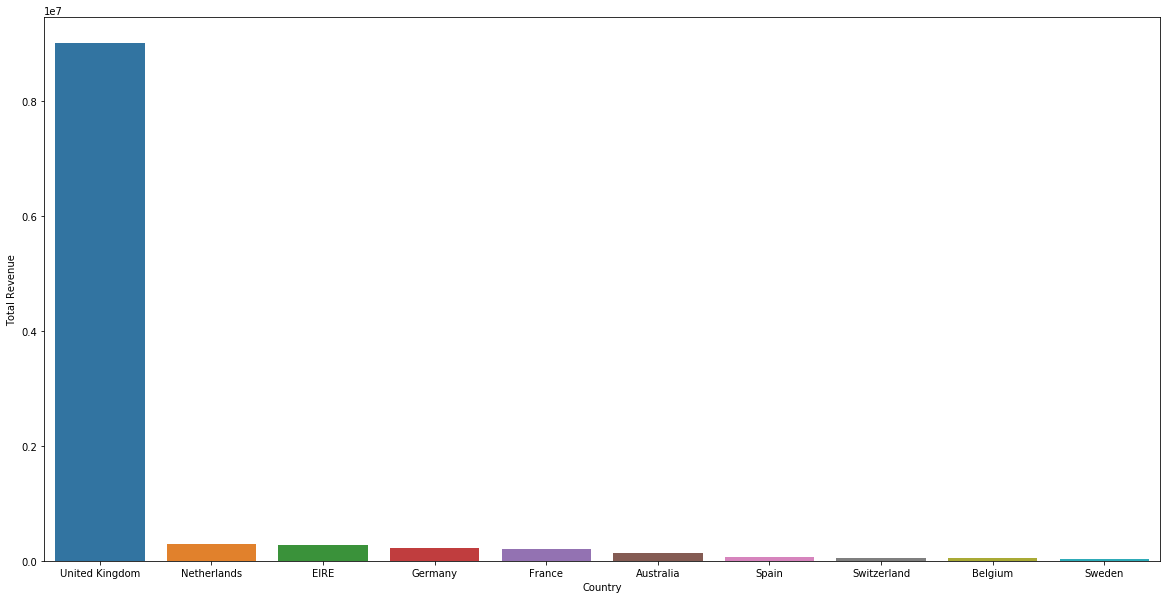

In [19]:
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline
fig, ax = plt.subplots(figsize=(20,10))
ax = sns.barplot(x="Country", y="TotalCost", data=countries_overview.head(10))
plt.ylabel("Total Revenue")
plt.show()

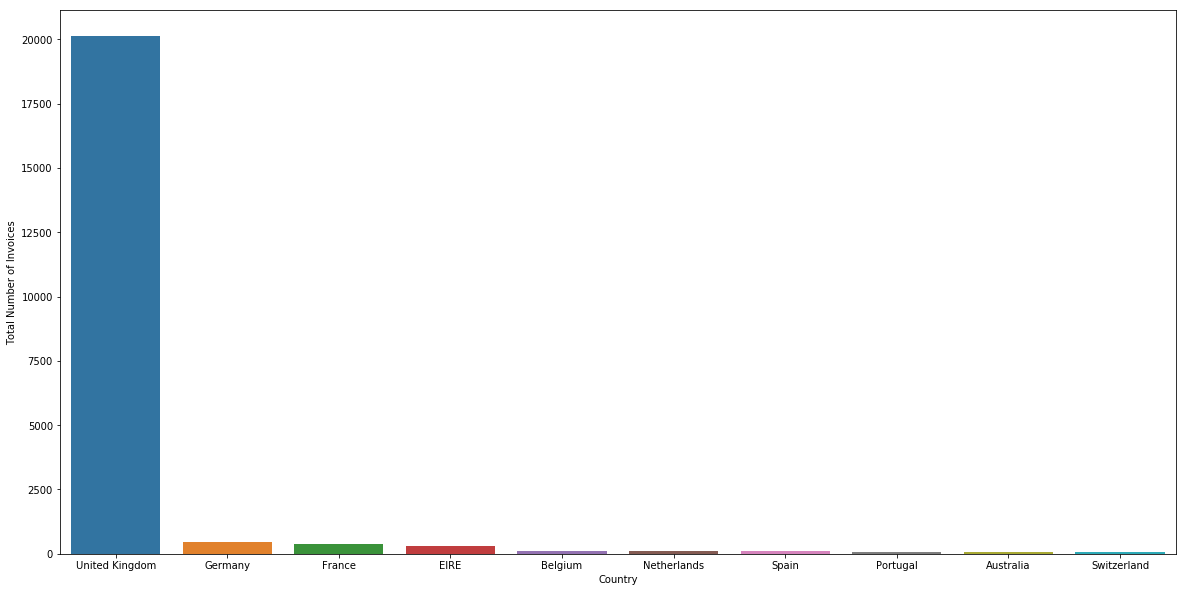

In [20]:
# Total of transactions per country
country_invoice = purchased_invoice.groupby("Country").agg({"InvoiceNo": lambda x: x.nunique()}).reset_index().sort_values(by="InvoiceNo", ascending=False)
country_invoice = country_invoice.rename(columns={"InvoiceNo": "Total Invoices"})

#Plot total number of invoices per country
fig, ax = plt.subplots(figsize=(20,10))
ax = sns.barplot(x="Country", y="Total Invoices", data=country_invoice.head(10))
ax.set(ylabel="Total Number of Invoices")
plt.show()

### UK has the largest number of Invoices as well as the largest revenue per country.

# Total Order by Month

In [38]:
# lets look at the monthly transaction market
# Add a new column with info year-month
data['year-month'] = data['InvoiceDate'].apply(lambda x: x.strftime('%Y-%m'))
data.head()


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalCost,year-month
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30,2010-12
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,2010-12
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00,2010-12
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,2010-12
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,2010-12


In [39]:
monthly_total_invoices = data.groupby("year-month")["InvoiceNo"].nunique()
monthly_total_invoices = monthly_total_invoices.reset_index()
monthly_total_invoices = monthly_total_invoices.rename(columns={"InvoiceNo": "Total Invoices"})
monthly_total_invoices.head()


,year-month,Total Invoices
0,2010-12,2025
1,2011-01,1476
2,2011-02,1393
3,2011-03,1983
4,2011-04,1744


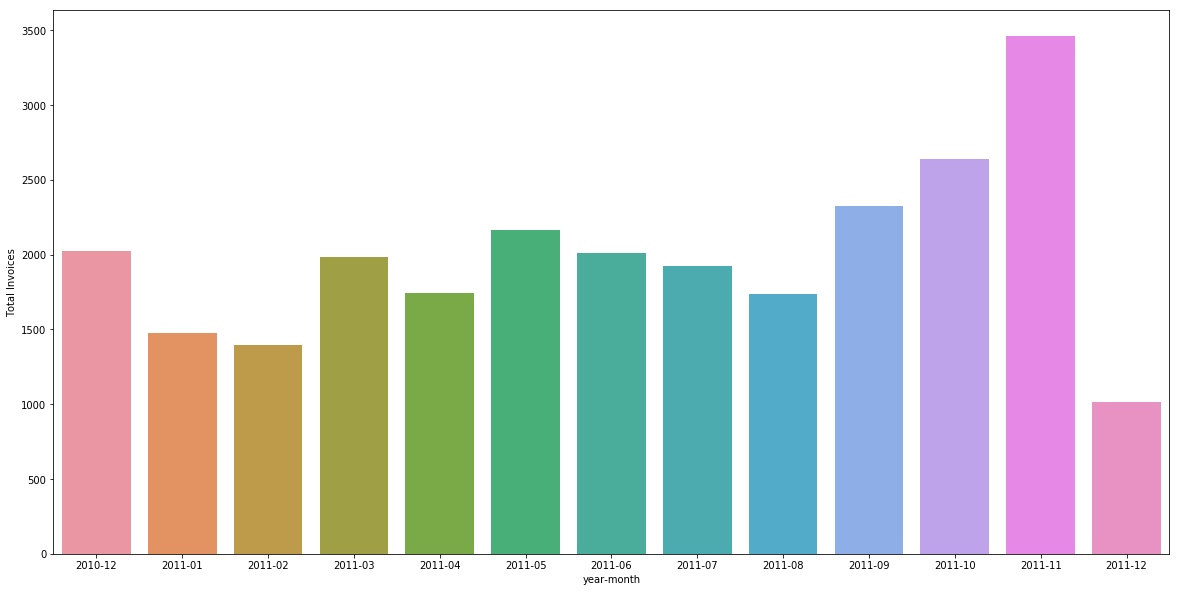

In [40]:
#Plot total number of invoices per country
monthly_total_invoices.reset_index()
fig, ax = plt.subplots(figsize=(20,10))
ax = sns.barplot(x="year-month", y="Total Invoices", data=monthly_total_invoices)
plt.show()

## November is the month with more orders, probably because every other store wants to supply its mechandise before Christmas .

# What do we want to answer?


Customer Segmentation is one important aspect for a Retail Store, however we will focus in a more interesting story, can we predict if an order will be cancelled or better yet, how likely is an order to be cancelled. 
I believe this is an important question that every retail store would like to know.  
For this we will work with cancelled and purchased orders. As features we will use the description, the total cost of the invoice and country of request. 


# 1. Clustering products
First we want to find some knowledge from the products the users are buying and so trying to encode some meaningful information for our model. 

In [41]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 10 columns):
InvoiceNo      541909 non-null object
StockCode      541909 non-null object
Description    540455 non-null object
Quantity       541909 non-null int64
InvoiceDate    541909 non-null datetime64[ns]
UnitPrice      541909 non-null float64
CustomerID     406829 non-null float64
Country        541909 non-null object
TotalCost      541909 non-null float64
year-month     541909 non-null object
dtypes: datetime64[ns](1), float64(3), int64(1), object(5)
memory usage: 41.3+ MB


### Data Preparation

First we will get ride of missing data. We will get ride of all rows with missing data. 


In [42]:
retail_data = data.dropna()

In [43]:
#drop duplicade rows
retail_data = retail_data.drop_duplicates() 

In [44]:
retail_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 401604 entries, 0 to 541908
Data columns (total 10 columns):
InvoiceNo      401604 non-null object
StockCode      401604 non-null object
Description    401604 non-null object
Quantity       401604 non-null int64
InvoiceDate    401604 non-null datetime64[ns]
UnitPrice      401604 non-null float64
CustomerID     401604 non-null float64
Country        401604 non-null object
TotalCost      401604 non-null float64
year-month     401604 non-null object
dtypes: datetime64[ns](1), float64(3), int64(1), object(5)
memory usage: 33.7+ MB


### Tokenization of words from descriptions

In [65]:
#Get all descriptions
descriptions = retail_data["Description"].unique()

In [66]:
print("Total number of descriptions: %d " % len(descriptions))

Total number of descriptions: 3896 


In [67]:
print(descriptions)

['WHITE HANGING HEART T-LIGHT HOLDER' 'WHITE METAL LANTERN'
 'CREAM CUPID HEARTS COAT HANGER' ..., 'PINK CRYSTAL SKULL PHONE CHARM'
 'CREAM HANGING HEART T-LIGHT HOLDER' 'PAPER CRAFT , LITTLE BIRDIE']


While tokenizing the words we will get the root of the word, we will try to cluster descriptions using the well know bag of words and also using tfidf features. 

In [68]:
import nltk
import re

stopwords = nltk.corpus.stopwords.words('english')

#Load nltk's SnowballStemmer as stemmer
from nltk.stem.snowball import SnowballStemmer
stemmer = SnowballStemmer("english")


In [69]:
#Returns root of tokens (words) from the descriptions 
def tokenize_and_stem(description):
    #first tokenize
    tokens = [word.lower() for sent in description for word in nltk.word_tokenize(str(sent)) ]
    #tokens = list(set(tokens))
    
    
    #filter out tokens not containing letters, raw puntuation, numeric tokens
    filtered_tokens = []
    for token in tokens:
        if re.search('[a-zA-Z]', str(token)):
            filtered_tokens.append(token)
    stems = [stemmer.stem(t) for t in filtered_tokens]
    return stems

    
#Returns root of tokens (words) from the descriptions 
def tokenize(description):
    #first tokenize
    tokens =[word.lower() for sent in description for word in nltk.word_tokenize(str(sent)) ]
    #tokens = list(set(tokens))
    
    #filter out tokens not containing letters, raw puntuation, numeric tokens
    filtered_tokens = []
    for token in tokens:
        if re.search('[a-zA-Z]', str(token)):
            filtered_tokens.append(token)
    
    return filtered_tokens

In [70]:
vocab_tokenized = tokenize(descriptions)
vocab_stemmed = tokenize_and_stem(descriptions)

In [71]:
vocab_df = pd.DataFrame({'words': vocab_tokenized}, index = vocab_stemmed)
vocab_df.head(10)


,words
white,white
hang,hanging
heart,heart
t-light,t-light
holder,holder
white,white
metal,metal
lantern,lantern
cream,cream
cupid,cupid


Some example of the words and its roots. 

In [72]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf_vectorizer = TfidfVectorizer(max_df=0.5, min_df=0.2, stop_words='english',
                                 use_idf=True, tokenizer=tokenize_and_stem)
tfidf_matrix = tfidf_vectorizer.fit_transform(descriptions) 


In [73]:
print("Shape of tfidf feature matrix: ", tfidf_matrix.shape)

Shape of tfidf feature matrix:  (3896, 8)


The Tf-idf counts the word occurrences by descriptions. Then a weight for term frequency-inverse is applied, this means that words that occur frequently within a description but no frequently in the corpus will receive a higher weighting. 


Before applying clustering, we will use PCA for decreasing the dimensions and ploting the the feature matrix. 

(3896, 26)


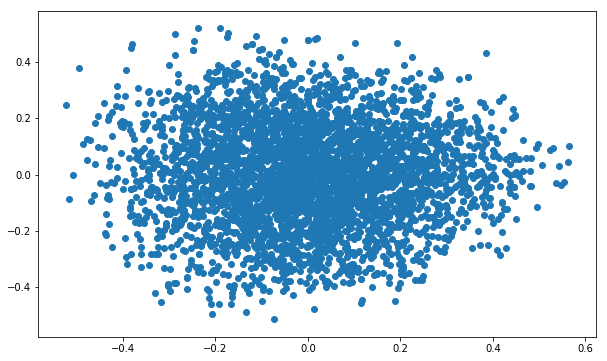

In [74]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA
pipeline = Pipeline([
    ('vect', CountVectorizer(tokenizer=tokenize_and_stem)),
    ('tfidf', TfidfTransformer()),
])

X = pipeline.fit_transform(descriptions).todense()

print(X.shape)
pca = PCA(n_components=2).fit(X)
data_reduced = pca.transform(X)

plt.figure(figsize=(10,6))
plt.scatter(data_reduced[:,0], data_reduced[:,1])



(3896, 2039)


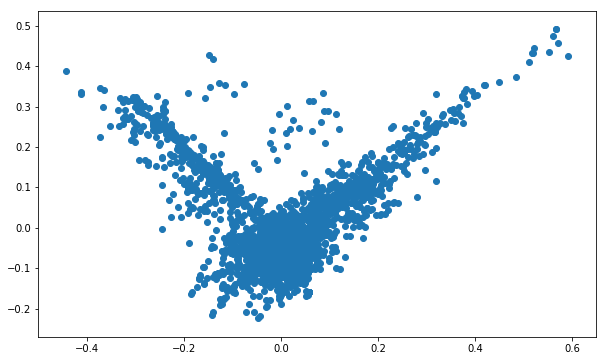

In [75]:
pipeline = Pipeline([
    ('vect', CountVectorizer()),
    ('tfidf', TfidfTransformer()),
])

X = pipeline.fit_transform(descriptions).todense()

print(X.shape)
pca = PCA(n_components=2).fit(X)
data_reduced = pca.transform(X)

plt.figure(figsize=(10,6))
plt.scatter(data_reduced[:,0], data_reduced[:,1])


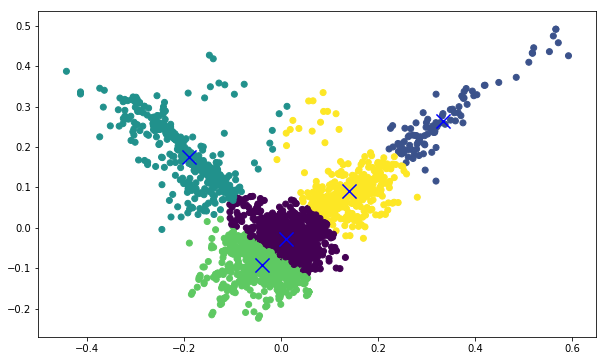

In [76]:
# Kmeans clustering 
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters= 5, random_state=42).fit(data_reduced)
labels = kmeans.predict(data_reduced)
plt.figure(figsize=(10,6))
plt.scatter(data_reduced[:,0], data_reduced[:,1], c = labels)

#plot centroids 
centroids = kmeans.cluster_centers_
plt.scatter(centroids[:, 0], centroids[:, 1], marker='x', color='b', s=200)


(3896, 2039)


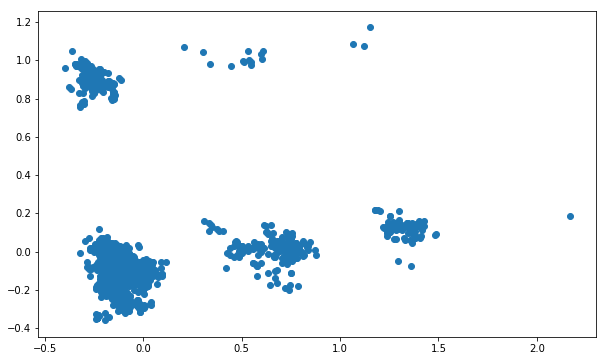

In [77]:
pipeline = Pipeline([
    ('vect', CountVectorizer()),
])

X = pipeline.fit_transform(descriptions).todense()

print(X.shape)
pca = PCA(n_components=2).fit(X)
data_reduced = pca.transform(X)

plt.figure(figsize=(10,6))
plt.scatter(data_reduced[:,0], data_reduced[:,1])

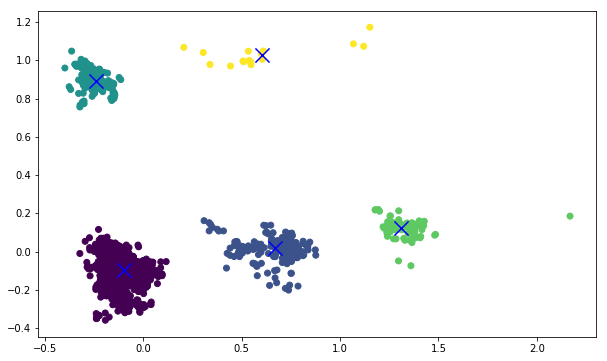

In [78]:
# Kmeans clustering 
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters= 5, random_state=42).fit(data_reduced)
labels = kmeans.predict(data_reduced)
plt.figure(figsize=(10,6))
plt.scatter(data_reduced[:,0], data_reduced[:,1], c = labels)

#plot centroids 
centroids = kmeans.cluster_centers_
plt.scatter(centroids[:, 0], centroids[:, 1], marker='x', color='b', s=200)

From all the experiments the most simple token counts worked better than using TF-idf and also stemming didnt improve the results. When clustering, the most dificult part is to come up with the right number of clusters, in cases like this, we clearly can see forming 6-5 clusters. We will choose 5. We can see some outliers but in this case it doesnt change too much the results. 

In [79]:
#Total counts for the different clusters 
description_labels = pd.DataFrame({"Description": descriptions, "Cluster": labels})
df_labels = description_labels
df_labels["Cluster"].value_counts()

0    3166
2     297
1     279
3     138
4      16
Name: Cluster, dtype: int64

# Getting some insight from product clusters

In [80]:
#Get top 5 words from the different clusters
top5 = {}

for i in range(5):
    top5[str(i)] = pd.Series(' '.join(df_labels[df_labels["Cluster"] == i]["Description"]).lower().split()).value_counts()[:5]
    print("######Cluster %d #######" % (i+1))  
    print(top5[str(i)])

######Cluster 1 #######
blue       199
heart      192
red        177
vintage    171
bag        139
dtype: int64
######Cluster 2 #######
set      135
of        91
pack      49
12        32
paper     20
dtype: int64
######Cluster 3 #######
pink        273
heart        24
flower       20
polkadot     19
bag          15
dtype: int64
######Cluster 4 #######
set    139
of     138
4       31
6       27
3       22
dtype: int64
######Cluster 5 #######
pink    15
of       9
set      6
3        3
pack     3
dtype: int64


From the clusters we can see the top 5 words. For cluster 3, there is a big amount of articles with the color pink. 

In [81]:


retail_data.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalCost,year-month
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30,2010-12
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,2010-12
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00,2010-12
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,2010-12
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,2010-12


In [82]:
retail_data.count()

InvoiceNo      401604
StockCode      401604
Description    401604
Quantity       401604
InvoiceDate    401604
UnitPrice      401604
CustomerID     401604
Country        401604
TotalCost      401604
year-month     401604
dtype: int64

In [83]:
# Add clusters to every retail_data Dataframe
retail_data = pd.merge(retail_data, df_labels, on="Description")

In [84]:
retail_data.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalCost,year-month,Cluster
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.3,2010-12,0
1,536373,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 09:02:00,2.55,17850.0,United Kingdom,15.3,2010-12,0
2,536375,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 09:32:00,2.55,17850.0,United Kingdom,15.3,2010-12,0
3,536390,85123A,WHITE HANGING HEART T-LIGHT HOLDER,64,2010-12-01 10:19:00,2.55,17511.0,United Kingdom,163.2,2010-12,0
4,536394,85123A,WHITE HANGING HEART T-LIGHT HOLDER,32,2010-12-01 10:39:00,2.55,13408.0,United Kingdom,81.6,2010-12,0


We want to use the encoded data (number of clusters) in something not categorical, we can first create a new Data frame for every InvoiceNo and instead of using one-hot encoding for the clusters we can add new columns representing the total price for each category. 

In [85]:
invoice_data = retail_data[["InvoiceNo", "Cluster", "TotalCost", "InvoiceDate", "Country", "year-month"]]

In [86]:
invoice_data.head()

,InvoiceNo,Cluster,TotalCost,InvoiceDate,Country,year-month
0,536365,0,15.3,2010-12-01 08:26:00,United Kingdom,2010-12
1,536373,0,15.3,2010-12-01 09:02:00,United Kingdom,2010-12
2,536375,0,15.3,2010-12-01 09:32:00,United Kingdom,2010-12
3,536390,0,163.2,2010-12-01 10:19:00,United Kingdom,2010-12
4,536394,0,81.6,2010-12-01 10:39:00,United Kingdom,2010-12


In [87]:
invoice_cluster = invoice_data.groupby(["InvoiceNo", "Cluster"]).agg({"TotalCost":sum})
invoice_cluster.head(10)

TotalCost
InvoiceNo Cluster           
536365    0           123.82
          1            15.30
536366    0            22.20
536367    0           218.48
          1            60.25
536368    0            44.55
          1            25.50
536369    0            17.85
536370    0           547.76
          1           218.10

In [88]:
invoice_categories = invoice_cluster.pivot_table("TotalCost", ["InvoiceNo"], 'Cluster')

#fill NaN as zero 
invoice_categories =  invoice_categories.fillna(0)
invoice_categories.columns = ["Cat_0" , "Cat_1", "Cat_2", "Cat_3", "Cat_4"]
invoice_categories = invoice_categories.reset_index()
invoice_categories.head()


,InvoiceNo,Cat_0,Cat_1,Cat_2,Cat_3,Cat_4
0,536365,123.82,15.30,0.0,0.0,0.0
1,536366,22.20,0.00,0.0,0.0,0.0
2,536367,218.48,60.25,0.0,0.0,0.0
3,536368,44.55,25.50,0.0,0.0,0.0
4,536369,17.85,0.00,0.0,0.0,0.0


From all the experiments the most simple token counts worked better than using TF-idf and also stemming didnt improve the results. When clustering, the most dificult part is to come up with the right number of clusters, in cases like this, we clearly can see forming 6-5 clusters. We will choose 5. 

In [89]:
len(invoice_data)

401604

In [90]:
print("Number of invoices : %d" % len(invoice_categories))

Number of invoices : 22190


In [91]:

invoice_nodup = invoice_data[["InvoiceNo","Country", "year-month"]].drop_duplicates() 
X = pd.merge(invoice_categories, invoice_nodup[["InvoiceNo", "Country", "year-month"]], on="InvoiceNo" )

In [92]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 22190 entries, 0 to 22189
Data columns (total 8 columns):
InvoiceNo     22190 non-null object
Cat_0         22190 non-null float64
Cat_1         22190 non-null float64
Cat_2         22190 non-null float64
Cat_3         22190 non-null float64
Cat_4         22190 non-null float64
Country       22190 non-null object
year-month    22190 non-null object
dtypes: float64(5), object(3)
memory usage: 1.5+ MB


In [93]:
X.head()

,InvoiceNo,Cat_0,Cat_1,Cat_2,Cat_3,Cat_4,Country,year-month
0,536365,123.82,15.30,0.0,0.0,0.0,United Kingdom,2010-12
1,536366,22.20,0.00,0.0,0.0,0.0,United Kingdom,2010-12
2,536367,218.48,60.25,0.0,0.0,0.0,United Kingdom,2010-12
3,536368,44.55,25.50,0.0,0.0,0.0,United Kingdom,2010-12
4,536369,17.85,0.00,0.0,0.0,0.0,United Kingdom,2010-12


If we want to build a model to classify and we want to encode the information of the country, we could do this using one hot encoding, however since we know that there is very little revenue compared to UK and that there are relative many countries we decide to only use invoices coming from UK.



Since we only have one year of data and our model will be trained on 10 months and 2 months for testing, we decided that the year-month variable would help our model. Since this variable would be unseen while testing. 

In [94]:
##Keep only data from UK
X = X[X["Country"] == "United Kingdom"]
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19857 entries, 0 to 22189
Data columns (total 8 columns):
InvoiceNo     19857 non-null object
Cat_0         19857 non-null float64
Cat_1         19857 non-null float64
Cat_2         19857 non-null float64
Cat_3         19857 non-null float64
Cat_4         19857 non-null float64
Country       19857 non-null object
year-month    19857 non-null object
dtypes: float64(5), object(3)
memory usage: 1.4+ MB


In [112]:
X.head()

,InvoiceNo,Cat_0,Cat_1,Cat_2,Cat_3,Cat_4,Country,year-month,is_cancelled
0,536365,123.82,15.30,0.0,0.0,0.0,United Kingdom,2010-12,0
1,536366,22.20,0.00,0.0,0.0,0.0,United Kingdom,2010-12,0
2,536367,218.48,60.25,0.0,0.0,0.0,United Kingdom,2010-12,0
3,536368,44.55,25.50,0.0,0.0,0.0,United Kingdom,2010-12,0
4,536369,17.85,0.00,0.0,0.0,0.0,United Kingdom,2010-12,0


In [113]:
X["is_cancelled"] = X["is_cancelled"].astype(int)

In [114]:
X["is_cancelled"].value_counts()

0    16649
1     3208
Name: is_cancelled, dtype: int64

In [115]:
16649 + 3208

19857

Finally we have 16649 invoices with that were not cancelled, against 3208 that were cancelled. 
Lets try to divide the data in train and test and see the distributions. 
It is important to treat all numbers as positives, regarding if it is a cancelled order. 

Since we wont use the time data as a predictor, we will divide the the train and test datasets trying to keep the ratio between the number of cancelled and not cancelled. 


# 16649 NOT CANCELLED
# 3208 CANCELLED

We will use de 80/20 rule of thumb for the training data and the test one. 

In [116]:
#Make all values positive
X[["Cat_0", "Cat_1", "Cat_2", "Cat_3", "Cat_4"]] = abs(X[["Cat_0", "Cat_1", "Cat_2", "Cat_3", "Cat_4"]])



In [117]:
X_false = X[X["is_cancelled"] == 0]
X_positive = X[X["is_cancelled"] == 1]


In [118]:
from sklearn.utils import shuffle 
X_false = shuffle(X_false)
X_positive = shuffle(X_positive)

In [119]:
X_false.shape

(16649, 9)

In [120]:
X_positive.shape

(3208, 9)

In [121]:
#get not cancelled invoices into the 
idx     = int(X_false.shape[0] * 0.8)
X_train = X_false.iloc[:idx, :]
X_test  = X_false.iloc[idx:, :]

#get the cancelled invoices
idx     = int(X_positive.shape[0] * 0.8)
X_train = X_train.append(X_positive.iloc[:idx, :])
X_test  = X_test.append(X_positive.iloc[idx:,:])



### This is where I stopped, from here we can train different classifiers or use any emsambling method. 
### It is important to note that this is a imbalanced dataset, other methods for measuring performance have to be used, such as F1 score, instead of only Accuracy. 

### If I had more time I would like to train my model and see if I could predict any of the cancelled invoices, 
### it is common in data science that most of the time is spent on data cleaning and organizing it, like I did it. 
### Which is also the most boring part, from here we can try several classifiers and also use emsambling methods.
### Similar to this problem is to try to predict the cost per invoice, which is a regression task. 

### Trying to predict when and order will be cancelled its very important for the business, since then we can try to make everything possible to stop from being cancelled, like if we know that a invoice is 0.8 likely to be cancelled and the total cost is really high we could try to persuade even more (e. g. give a discount) to the customer. 

### Also, if we could try to predict the the products that are likely to be sold in a given month or period of time, the business can make and plan ahead for managing the stock of the products. 

### Also trying to cluster the users would be another option, this can be done in a RFM setting. This could give us other insights like what are the products that the different clusters of clients prefer buying. 


### Another way to use the client clusters is to add it to our first model, that first predict to what cluster a new user belongs and then add this in to the model for predicting if the order will be cancelled or not. 